# Прогноз оттока клиентов сети фитнес-клубов «Культурист-датасаентист»

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Прогноз-оттока-клиентов-сети-фитнес-клубов-«Культурист-датасаентист»" data-toc-modified-id="Прогноз-оттока-клиентов-сети-фитнес-клубов-«Культурист-датасаентист»-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Прогноз оттока клиентов сети фитнес-клубов «Культурист-датасаентист»</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Импорт-библиотек-и-данных" data-toc-modified-id="Импорт-библиотек-и-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Импорт библиотек и данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></li></ul></div>

## Описание проекта

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. 

Задача исследования — провести анализ и подготовить план действий по удержанию клиентов.
А именно:
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
1. выделить целевые группы клиентов;
2. предложить меры по снижению оттока;
3. определить другие особенности взаимодействия с клиентами.


**Описание данных:**
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Набор данных включает следующие поля:
Данные клиента за предыдущий до проверки факта оттока месяц:
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

## Импорт библиотек и данных

Импортируем необходимые для исследования библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import warnings

warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans



Загрузим датасет для дальнейшего исследования.

In [2]:
try: 
    df = pd.read_csv('datasets/gym_churn.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/gym_churn.csv')

## Предобработка данных

Изучим имеющиеся у нас данные.

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.duplicated().sum()

0

В датасете 14 колонок и 4000 строк. Пропусков и дубликатов нет, все данные в нужных форматах. Изучим средние значения и стандартные отклонения показателей.

Далее приведем названия всех столбцов к нижнему регистру.

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Анализ средних значений показывает, что приоритетом в выборе клуба явлется близость к дому или месту работы, партнерство или рекомендация друзей влияют в меньшей степени. Средняя продолжительность заключения договора 4-5 месяцев. Групповые занятия посещают менее половины клиентов клуба. Средний возраст клиента 29 лет. В среднем клиенты дополнительно тратят почти по 150 у.е. Средняя продолжительность посещения клуба почти 4 месяца. За последний месяяц клиенты посещали клуб менее 2 раз в неделю, что соотвествует посещаемости на протяжении всего лайфтайма. 

Далее разделим данные на 2 группы: те кто остался (значение столбца 'Churn' = 0) и тех, кто попал в отток (значение столбца 'Churn' = 1)

In [8]:
df.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Клиенты, которые остаются в фитнес-клубе, как правило:
1. живут или работают поблизости, 
2. более половины являются сотрудником компании-партнёра клуба, 
3. в 35% случаев приходят в рамках акции «приведи друга»,
4. в 90% оставляют свой номер телефона,
5. заключают договор по 5-6 месяцев,
6. 50% клиентов посещают групповые занятия,
7. средний возраст 30 лет,
8. суммарно тратят 158 у.е. на дополнительные услуги фитнес-центра,
9. впервые начали ходить почти 5 месяцев назад,
10. в среднем посещают тренировки по 2 раза в неделю.

Клиенты, которые попадают в отток:
1. Также живут или работают поблизости (77%)
2. Только 35% являются сотрудником компании-партнёра клуба,
3. лишь в 18% случаев пришли по акции "приведи друга",
4. в 90% оставляют свой номер телефона,
5. покупают абонемент на 1-2 месяца,
6. только четверть посещает групповые занятия,
7. средний возраст 28 лет,
8. суммарно тратят 115 у.е. на дополнительные услуги фитнес-центра,
9. впервые начали ходить менее месяца назад,
10. в среднем посещают тренировки по 1 раз в неделю.

Далее построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

Сначала построим графики для количественных переменных. 

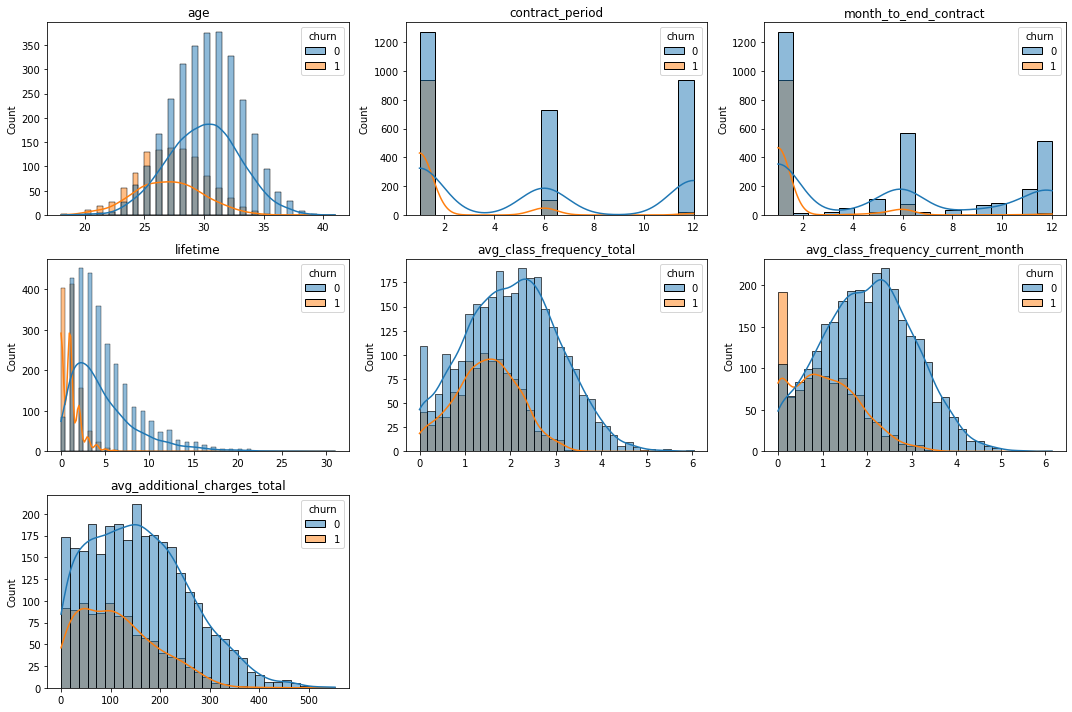

In [9]:
features = ['age', 'contract_period', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']



number_row = int(len(features)/3)
# добавим figsize=(15, 15) чтобы не было слишком мелкие графики
fig, ax = plt.subplots(nrows = number_row + 1, ncols=3, figsize=(15, 10))


# вытягиваем
ax = ax.flatten()

# задаем цикл

for i in range(len(features)):
    
    sns.histplot(data = df, x = df[features[i]], hue='churn', ax=ax[i], kde = True)
    sns.color_palette('coolwarm', 20)
    ax[i].set_title(f'{features[i]}')
    ax[i].set_xlabel('')


# удалим 2 последних, ибо пустые  
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
            


# чтобы все надписи влезли    
fig.tight_layout()
fig.show()

Клиенты более страшего возраста (после 27) дольше остаются клиентами клуба. Клиенты, купившие абонементы на полгода-год с большей вероятностью останутся в клубе, чем те, которые покупают краткосрочные абонементы на месяц. Посетители, которые являются клиентом клуба долгое время с меньшей вероятностью перестанут посещать в следующщем месяце.
Чем больше клиент тратит на дополнительные услуги клуба, тем больше вероятность, что он останется. Клиенты, которые в среднем посещают клуб 1 раз в неделю вероятнее попадут в отток в следующем месяце, чем посещающие 2 раза в неделю.

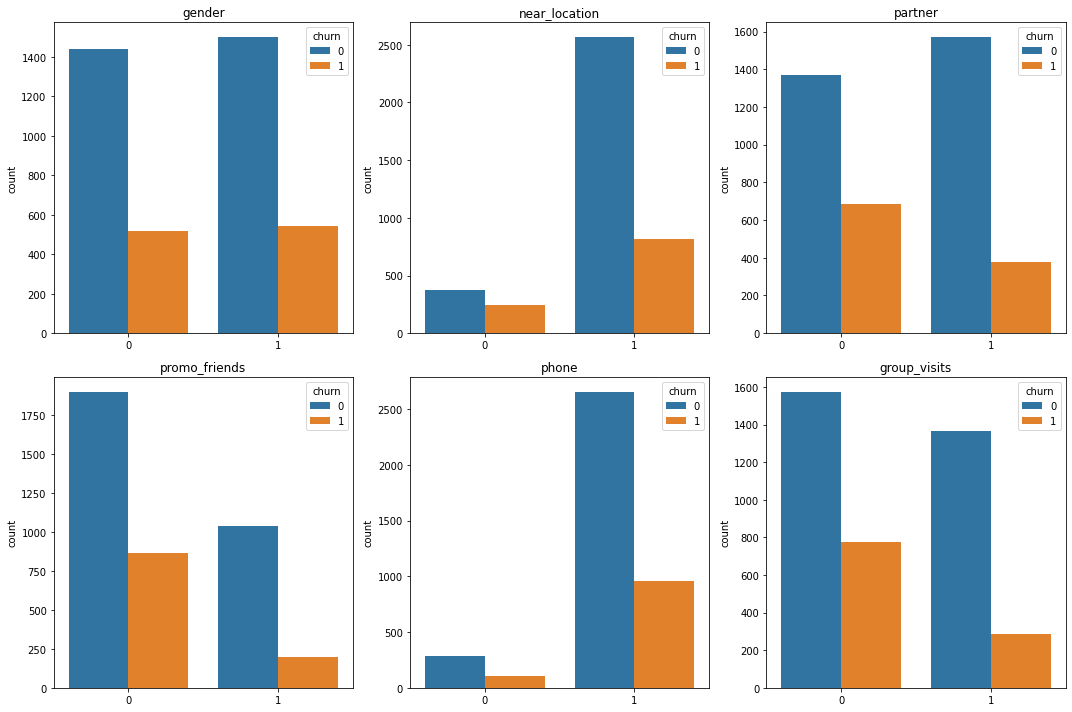

In [10]:
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']



number_row = int(len(features)/3)
# добавим figsize=(15, 15) чтобы не было слишком мелкие графики
fig, ax = plt.subplots(nrows = number_row, ncols=3, figsize=(15, 10))


# вытягиваем
ax = ax.flatten()

# задаем цикл

for i in range(len(features)):
    
#     добавляем kde = True
    sns.countplot(data = df, x = df[features[i]], hue='churn', ax=ax[i])

    ax[i].set_title(f'{features[i]}')
    ax[i].set_xlabel('')

 
# чтобы все надписи влезли    
fig.tight_layout()
fig.show()

Датасет является гендерно-нейтральным: распределение полов практически одинаковое в обеих группах. График подтверждает вывод о том, что большая часть клиентов клуба живет или работает поблизости. Сотрудник компаний-партнёров клуба вероятнее остаются клиентами. Акция "приведи друга" не столь эффективно удерживает клиентов. Практические все клиенты оставляют номера телефона, это не влияет на отток. Клиенты, посещающие групповые занятия, с большей вероятностью не уйдут в отток.

Далее построи матрицу корреляций признаков и отобразим её.

In [11]:
cm = df.corr() 
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


<AxesSubplot:>

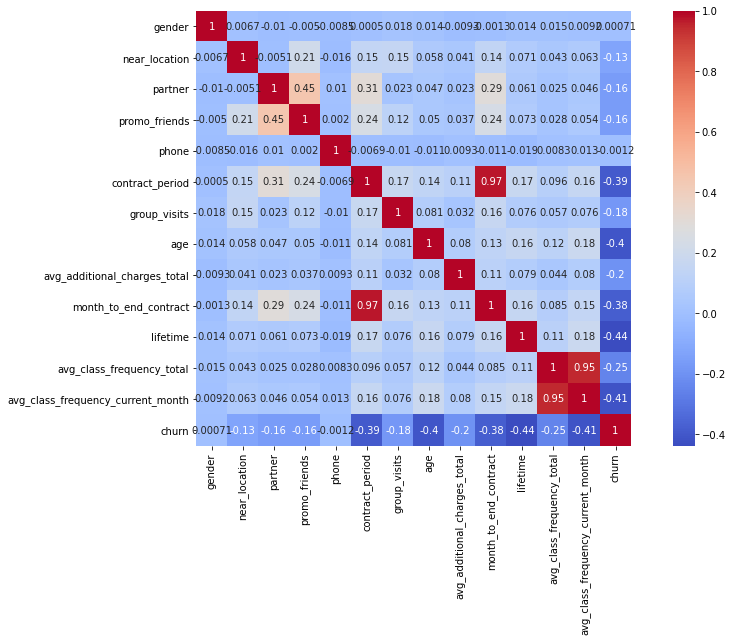

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, square=True, cmap='coolwarm')

Обнаружена сильная взаимосвязь между параметрами: длительность абонемента и количество месяцев до его окончания, а также средним количеством посещений в неделю за последний месяц и за весь период посещений, что явяется логичными. Остальные признаки слабо коррелируются между собой.

Проведена предобаботка данных. Пропусков, дубликатов, выбросов и аномалий не обнаружено. Все данные в необходимых форматах. Проведен анализ средних значений показателей для клиентов в двух группах — тех, кто ушел в отток и тех, кто остался. 

## Построение модели прогнозирования оттока клиентов

Разобьем данные на обучающую и валидационную выборку функцией train_test_split().

In [13]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['churn'])
y = df['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Обучим модель на train-выборке двумя способами:
логистической регрессией,
случайным лесом. Затем выберем, какая из моделей лучше на основе метрик accuracy, precision и recall .

In [14]:
# зададим алгоритм для модели
models = [LogisticRegression(random_state=0), RandomForestClassifier(random_state=0)] 

In [15]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

In [16]:
for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
    )

LogisticRegression(random_state=0)
Accuracy:0.91 Precision:0.82 Recall:0.80
RandomForestClassifier(random_state=0)
Accuracy:0.92 Precision:0.84 Recall:0.82


Метрики показывают, что модель, построенная методом случайного леса показывает более точные результаты.

## Кластеризация клиентов


Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. 

In [17]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
X_sc = scaler.fit_transform(df.drop(columns = ['churn'])) # обучаем нормализатор и преобразуем набор данных 

In [18]:
linked = linkage(X_sc, method = 'ward') 

In [19]:
#plt.figure(figsize=(15, 10))  
#dendrogram(linked, orientation='top')
#plt.title('Hierarchial clustering for GYM')
#plt.show()

На основе дендограммы выберем количество кластеров, равное 5 и разделим клиентов на кластеры с помощью алгоритма K-Means.

In [20]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

In [21]:
df['cluster_churn'] = labels

In [22]:
cluster_features = df.groupby('cluster_churn').mean().reset_index()
numeric_columns = cluster_features.drop(columns=['cluster_churn']).columns
cluster_features.style.format({i: '{:.2f}' for i in numeric_columns}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns) \
    .highlight_min(color='coral', subset=numeric_columns)


,cluster_churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.50,0.96,0.78,0.57,1.00,10.89,0.54,29.98,160.76,9.95,4.74,1.98,1.97,0.03
1,1,0.52,0.86,0.47,0.31,0.00,4.79,0.43,29.30,143.96,4.48,3.92,1.85,1.72,0.27
2,2,0.50,0.00,0.46,0.08,1.00,2.35,0.22,28.48,135.46,2.20,2.81,1.66,1.48,0.44
3,3,0.49,1.00,0.35,0.24,1.00,1.95,0.34,28.17,131.62,1.86,2.44,1.25,1.01,0.51
4,4,0.56,0.98,0.36,0.23,1.00,2.67,0.47,30.13,161.66,2.46,4.90,2.85,2.85,0.07


In [23]:
df.groupby('cluster_churn').agg({'gender':'count'})

,gender
cluster_churn,
0,1010
1,385
2,505
3,1262
4,838


Кластеризация подтвердила ранее сделанные выводы: если клиент живет или работает поблизости с клубом, работает в компании-партнере клуба, пришел по акции "приведи друга", купил абонемент на длительное время, его возраст около и более 30, он потратил на дополнительные услуги клуба более 150 у.е., ходит на тренировки не менее 2 раз в неделю и посещает групповые занятия, то такой клиент с меньшей вероятносью уйдет в отток. 

Далее построим диаграммы распределения признаков для кластеров.

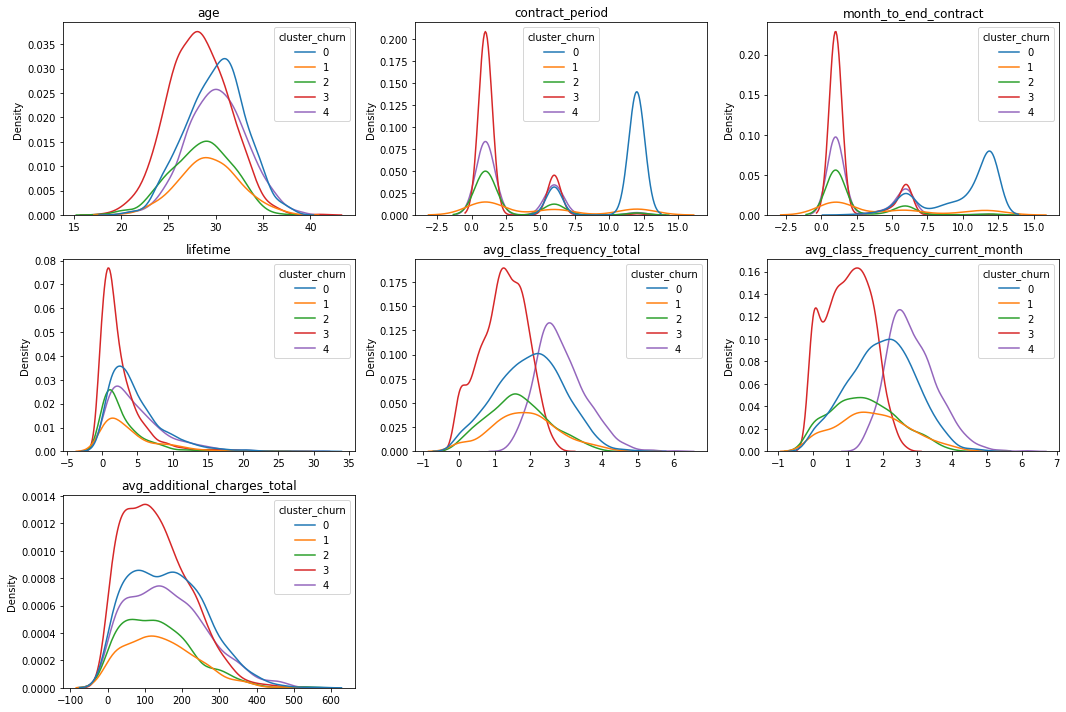

In [24]:
features = ['age', 'contract_period', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'avg_additional_charges_total']



number_row = int(len(features)/3)
# добавим figsize=(15, 15) чтобы не было слишком мелкие графики
fig, ax = plt.subplots(nrows = number_row + 1, ncols=3, figsize=(15, 10))


# вытягиваем
ax = ax.flatten()

# задаем цикл

for i in range(len(features)):
    
    sns.kdeplot(data = df, x = df[features[i]], hue='cluster_churn', ax=ax[i], palette="tab10")
    
    ax[i].set_title(f'{features[i]}')
    ax[i].set_xlabel('')


# удалим 2 последних, ибо пустые  
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
            


# чтобы все надписи влезли    
fig.tight_layout()
fig.show()

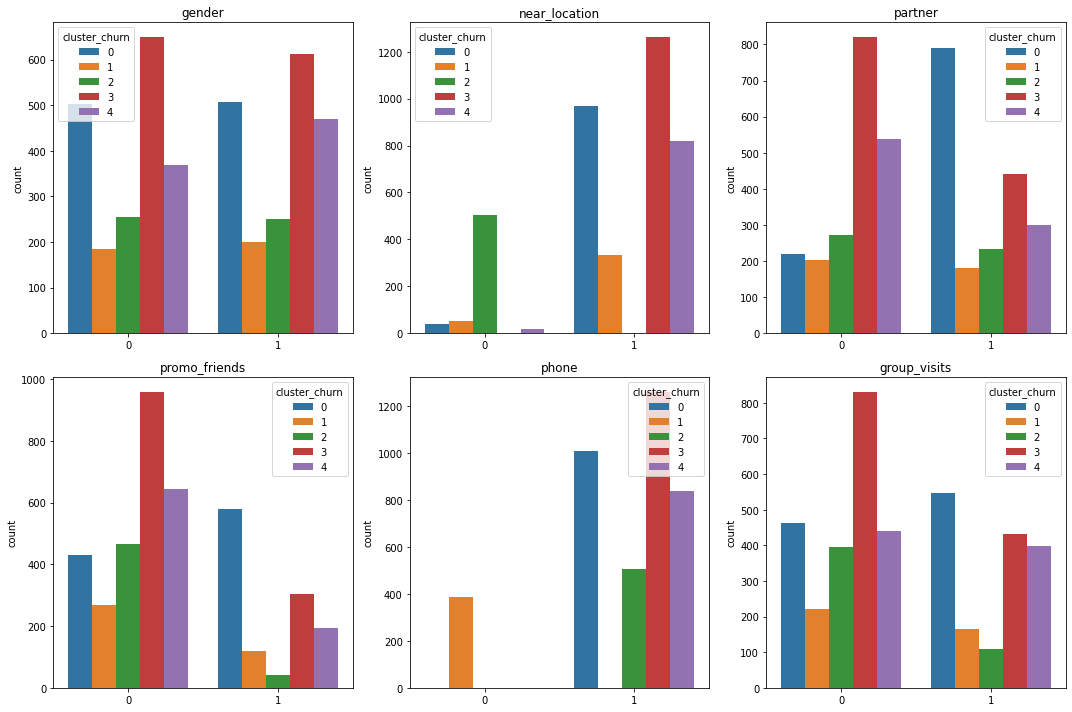

In [25]:
features = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits']



number_row = int(len(features)/3)
# добавим figsize=(15, 15) чтобы не было слишком мелкие графики
fig, ax = plt.subplots(nrows = number_row, ncols=3, figsize=(15, 10))


# вытягиваем
ax = ax.flatten()

# задаем цикл

for i in range(len(features)):
    
#     добавляем kde = True
    sns.countplot(data = df, x = df[features[i]], hue='cluster_churn', ax=ax[i], palette="tab10")

    ax[i].set_title(f'{features[i]}')
    ax[i].set_xlabel('')

 
# чтобы все надписи влезли    
fig.tight_layout()
fig.show()

Для каждого кластера определим долю оттока.

In [26]:
df.groupby('cluster_churn').agg({'churn':'mean'}).sort_values(by='churn', ascending=True)

,churn
cluster_churn,
0,0.027723
4,0.068019
1,0.267532
2,0.443564
3,0.514263


Проанализируем каждый кластер. 

Кластер 0. "Местные". Средний возраст немного за 30, покупают годовой абонемент, начали заниматься 3-4 месяца назад, посещают по 2 занятия в неделю, дополнительно потратили 100-200 у.е., живут или работают поблизости, работают в компании-партнере, в большинстве случаев пришли по акции "Приведи друга", оставили свой номер телефона и посещают групповые занятия.

Кластер 1. "Середнячки". Средний возраст 28-29 лет, покупают абонементы на 1, 6, и 12 месяцев, но чаще на 1, начали посещать фитнес-центр месяц назад, посещают занятия 1,5 раза в неделю, потратили 100 у.е. на дополнительные услуги, живут или работают поблизости, примерно в половине случаев работают в компании-партнере, не оставляют свой номер телефона и не посещают групповые занятия.

Кластер 2. "Неместные". Средний возраст 29 лет, покупают абонемент на 1 месяц, только пришли в клуб, посещают 1,5 занятия в неделю, тратят около 100 у.е. на допонительные услуги, не живут или работают поблизости, работают в компании партнере в чуть меньше половины случаев, не пришли по акции "Приведи друга", оставили свой номер телефона, не посещают групповые занятия.

Кластер 3. "Присматривающиеся". Средний возраст 27 лет, в большинстве случаев покупают абонемент на 1 месяц, только пришли в клуб, посещают 1 занятие в неделю, потратили 100 у.е. на дополнительные услуги, живут или работают поблизости, не работают в компании-партнере, оставили свой номер телефона, не посещают групповые занятия.

Кластер 4. "Фанаты спорта". Средний возраст около 30 лет, покупают абонемент на 1 месяц, пришли в клуб месяц назад, занимаются 3 раза в неделю, потратили около 150 у.е. на дополнительные услуги, живут или работают поблизости, в большинстве случаев не работают в компании-партнере, не пришли по акции "Приведи друга", оставили свой номер телефона и примерно в половине случаев посещают групповые занятия.

Самыми надежными являются кластеры 0 и 4, доля оттока в них менее 7%. Самые ненадежные кластеры 2 и 3. В них доля оттока более 44%.

## Выводы и рекомендации

Для разработки маркетингового плана по удержанию клиента были изучены данные по 4000 тысячам клиентов сети фитнес-клуба "Культурист-датасаентист". Была выполнена предобработка данных. Пропусков, дубликатов, выбросов и аномалий не обнаружено. Все данные в необходимых форматах.

Были построены 2 модели прогнозирования: линейная регрессия и случайный лес, а также проведена кластеризация. 
В результате были получены выводы, что для удержания клиентов необходимо:
1. привлекать клиентов, живущих или работающих поблизости с фитнес-клубом,
2. заключать договоры о партнерских программах с компаниями,
3. привлекать клиентов возрастом 29 и старше,
4. стимулировать покупать абонементы на полгода и год,
5. стимулировать клиентов заниматься в фитнес-клубе 2 и более раза в неделю и посещать групповые занятия.